In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,train_test_split
from sklearn.metrics import precision_score,confusion_matrix
from sklearn import tree

In [2]:
df=pd.read_csv("water.csv")

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<function matplotlib.pyplot.show(close=None, block=None)>

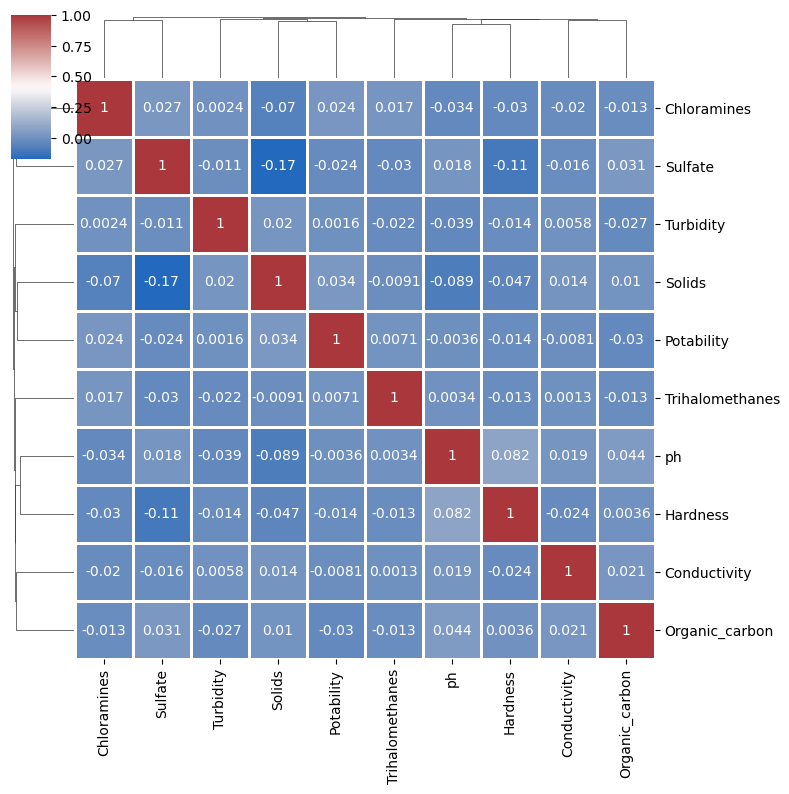

In [5]:
sns.clustermap(df.corr(), cmap="vlag",dendrogram_ratio=(0.1,0.1), annot=True,linewidths=0.8,figsize=(8,8))
plt.show

<Axes: >

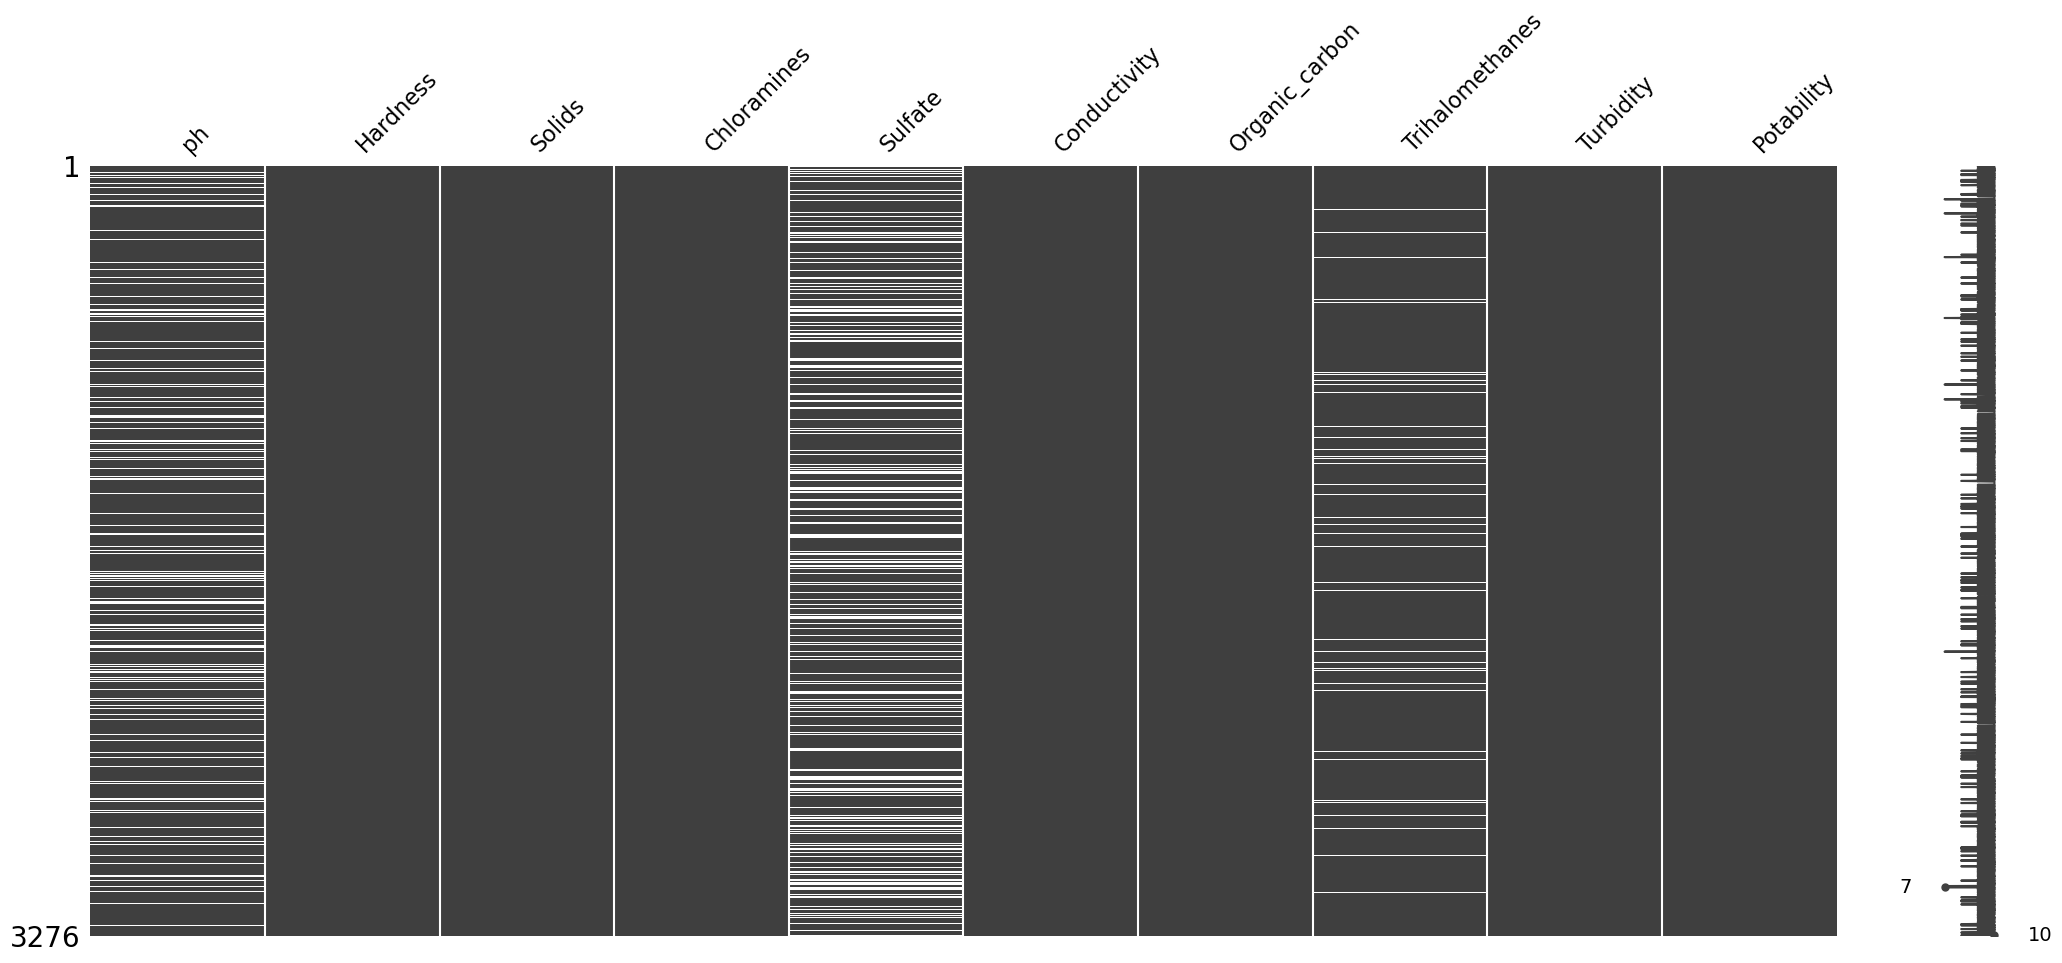

In [6]:
msno.matrix(df)

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
icilir=df.query("Potability == 1")

In [9]:
icilir.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1


In [10]:
icilmez=df.query("Potability == 0")

In [11]:
icilmez.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
print("İçilebilir su için pH ortalaması:", df.loc[df["Potability"] == 1, "ph"].mean())
print("İçilemez su için pH ortalaması:", df.loc[df["Potability"] == 0, "ph"].mean())


İçilebilir su için pH ortalaması: 7.0737832953812
İçilemez su için pH ortalaması: 7.085378435983544


In [13]:
icilir["ph"].fillna(icilir["ph"].mean(),inplace=True)
icilir.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13628\2281409531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  icilir["ph"].fillna(icilir["ph"].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13628\2281409531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icilir["ph"].fillna(icilir["ph"].mean(),inplace=True)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.073783,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1


In [14]:
icilmez["ph"].fillna(icilmez["ph"].mean(),inplace=True)
icilmez.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13628\2366231057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  icilmez["ph"].fillna(icilmez["ph"].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13628\2366231057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icilmez["ph"].fillna(icilmez["ph"].mean(),inplace=True)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [29]:
df.update(icilir)
df.update(icilmez)
df.head()
name=df.columns
df.head(),name

(         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
 0  7.085378  204.890455  20791.318981     7.300212  368.516441    564.308654   
 1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
 2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
 3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
 4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
 
    Organic_carbon  Trihalomethanes  Turbidity  Potability  
 0       10.379783        86.990970   2.963135           0  
 1       15.180013        56.329076   4.500656           0  
 2       16.868637        66.420093   3.055934           0  
 3       18.436524       100.341674   4.628771           0  
 4       11.558279        31.997993   4.075075           0  ,
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potabili

In [30]:
df["Sulfate"].fillna(df["Sulfate"].mean(),inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13628\3009155683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sulfate"].fillna(df["Sulfate"].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13628\3009155683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [31]:
for i in name:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri alt ve üst sınırlarla baskıla
    df[i] = df[i].clip(lower=lower_bound, upper=upper_bound)

In [43]:
df.isnull().sum()
print("NaN var mı?:", np.isnan(df).any())
print("Sonsuzluk var mı?:", np.isinf(df).any())

NaN var mı?: ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool
Sonsuzluk var mı?: ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool


In [33]:
#train-test
X=df.drop("Potability",axis=1).values
y=df["Potability"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
print("NaN var mı?:", np.isnan(X_train).any())
print("Sonsuzluk var mı?:", np.isinf(X_train).any())

NaN var mı?: False
Sonsuzluk var mı?: False


In [35]:
#istenilen aralığa sıkıştırır
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
x_train=scaler.transform(X_train)
x_test= scaler.transform(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

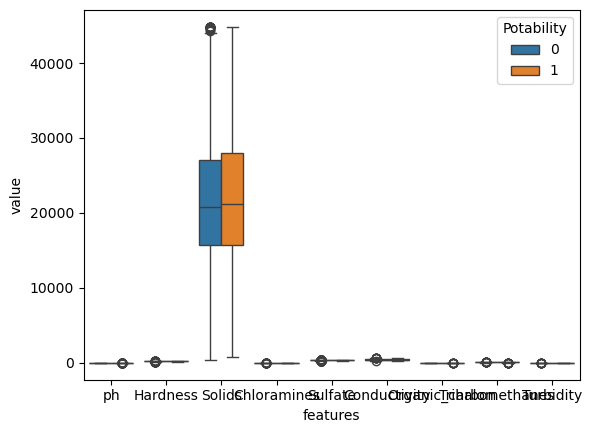

In [45]:
#görselleştirme
data_melted=pd.melt(df,id_vars="Potability",var_name="features",value_name="value")
#boxplot
plt.figure()
sns.boxplot(x="features",y="value",hue="Potability",data=data_melted)
plt.show

In [37]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
result=model.predict(x_test)
sc=precision_score(y_test,result)
cf=confusion_matrix(y_test,result)
sc
cf

array([[581,  36],
       [272,  94]], dtype=int64)

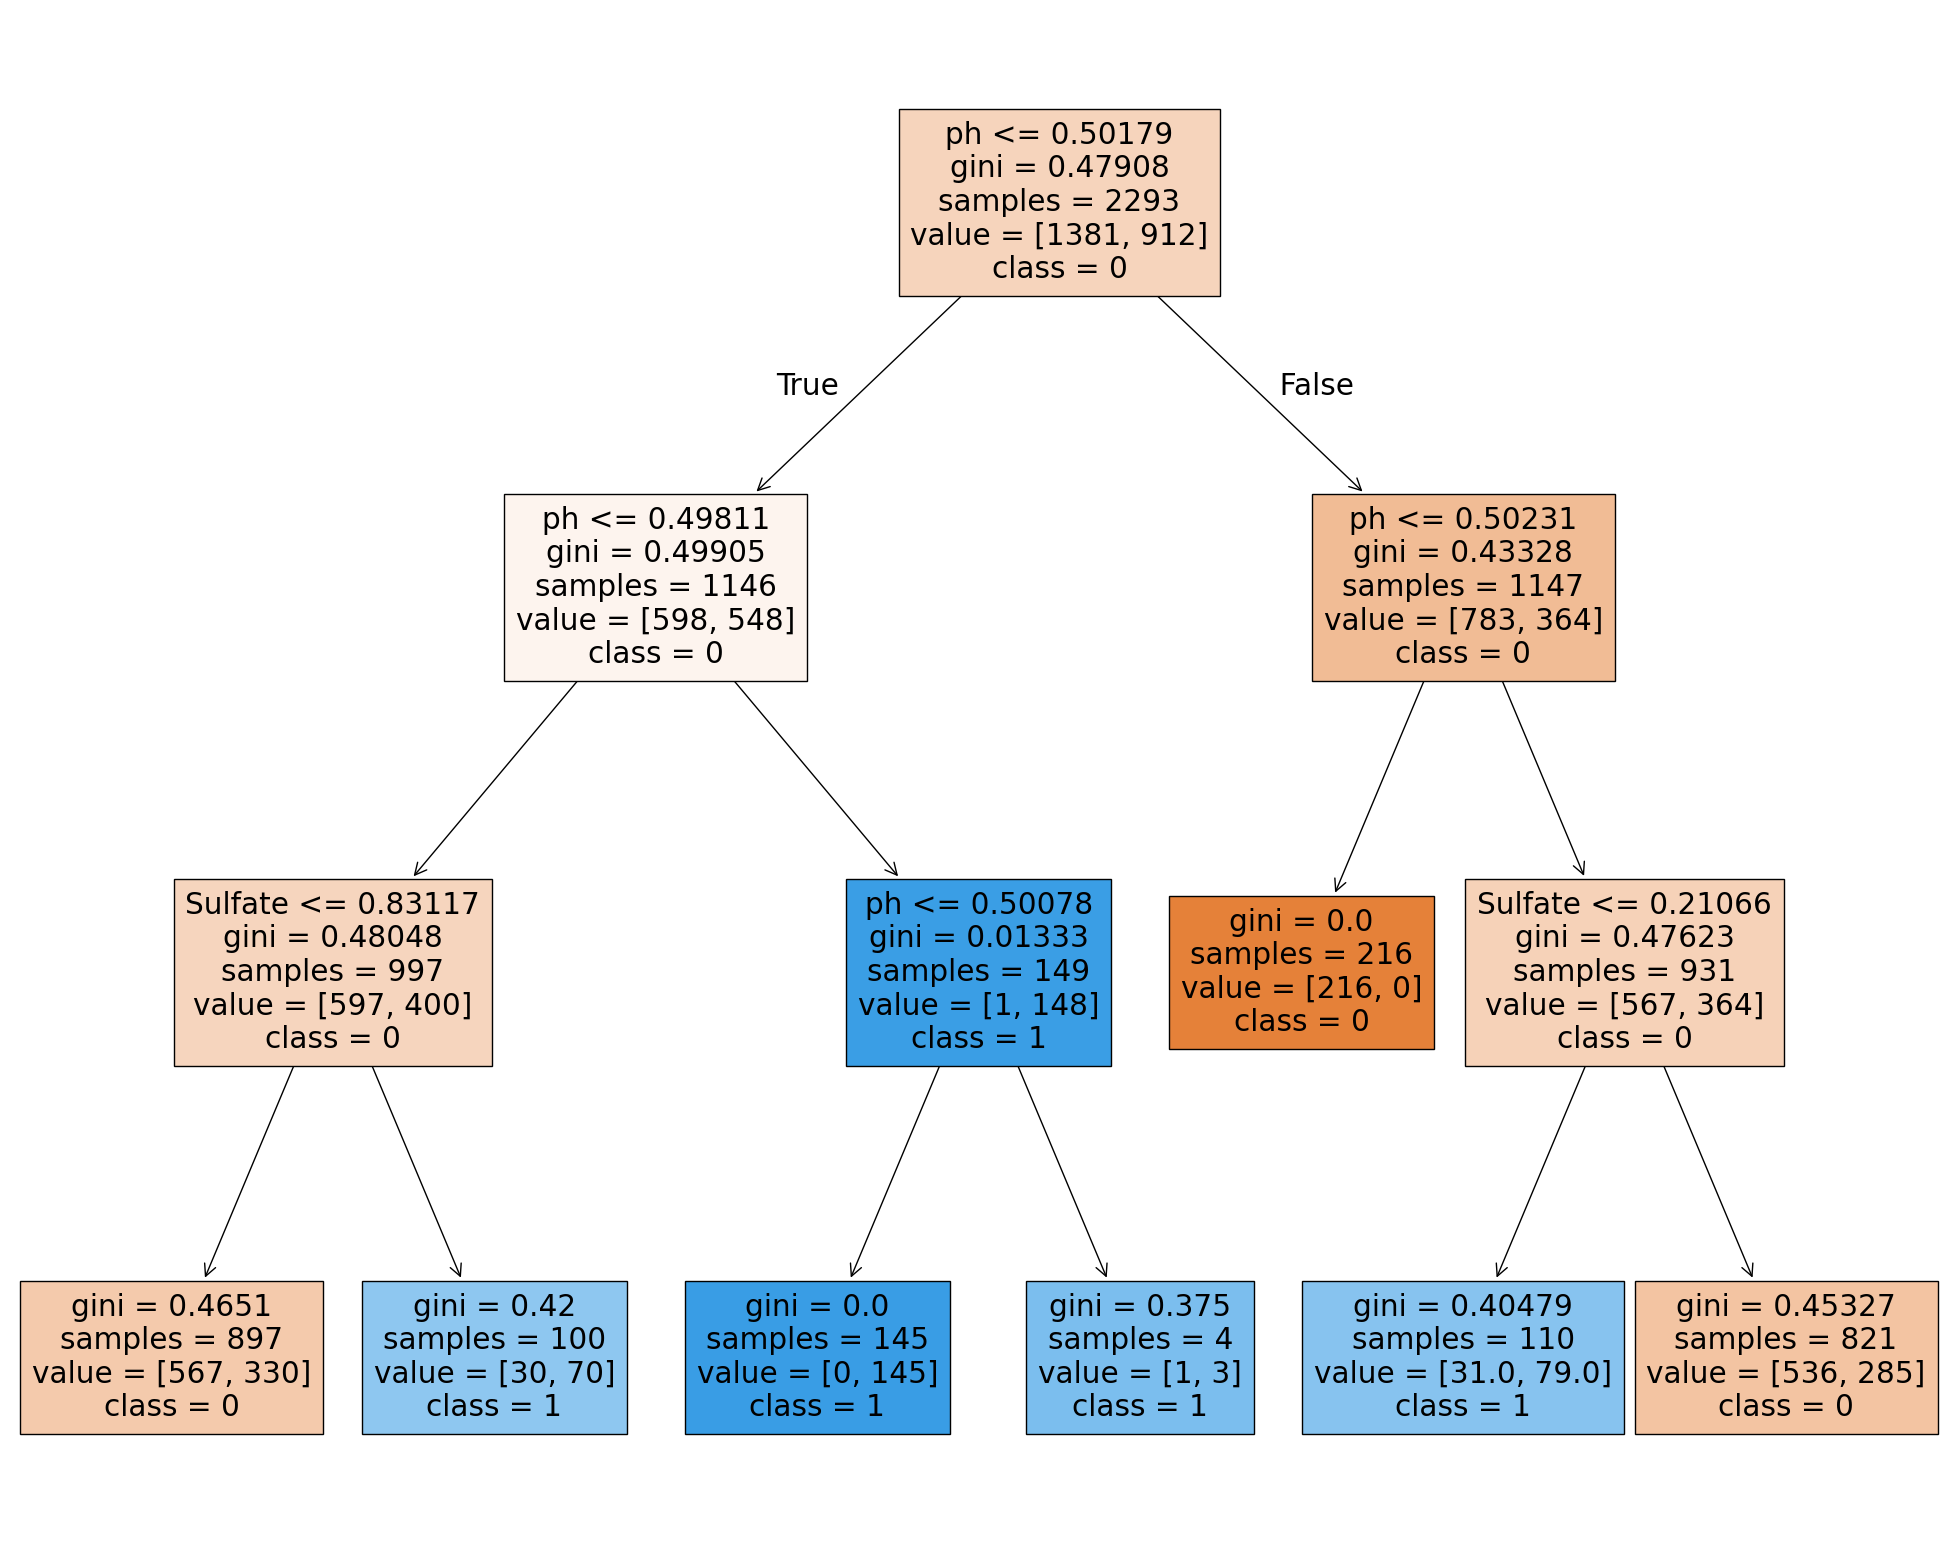

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
tree.plot_tree(
    model,
    feature_names=df.columns.tolist()[:-1],  # Özellik isimleri
    class_names=["0", "1"],  # Sınıf isimleri
    filled=True,
    precision=5
)
plt.show()


In [39]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
result=model.predict(x_test)
sc=precision_score(y_test,result)
cf=confusion_matrix(y_test,result)
sc
cf
model=DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
result=model.predict(x_test)
sc=precision_score(y_test,result)
cf=confusion_matrix(y_test,result)
sc
cf
model_params={
    "rf":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators": [10,50,100],
            "max_features": ["sqrt","log2"],
            "max_depth":list(range(1,24,3))
        }
    },
    "DT":
    {
        "model":DecisionTreeClassifier(),
        "params":
        {
            "min_samples_split": [2, 5, 10],
            "max_features": ["sqrt","log2"],
            "max_depth":list(range(1,24,3))
        }
    }
}
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs=RandomizedSearchCV(params["model"],params["params"],cv=cv,n_iter=10)
    rs.fit(x_train,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])

# Sonuçları yazdır
for score in scores:
    print(f"Model: {score[0]}, Best Params: {score[1]}, Best Score: {score[2]}")

Model: rf, Best Params: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}, Best Score: 0.7195764477552302
Model: DT, Best Params: {'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 7}, Best Score: 0.6572138025515883
